# Exercise

Modify the code as per the below instructions
- Use a different dataset.
- Modify the architecture, as below
    - Conv Max Conv Max Conv Max Flatten FC FC    
    - Conv Conv Max Conv Conv Max Flatten Global Avg Pooling
- Change the number of kernels and kernel size.



In [6]:
# Import the libraries
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

In [7]:
# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
# Load CIFAR-10 dataset
cifar10 = datasets.cifar10
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

In [9]:
# Preprocess the data
Xtrain = Xtrain.astype('float32') / 255
Xtest = Xtest.astype('float32') / 255
Ytrain = tf.keras.utils.to_categorical(Ytrain, num_classes=10)
Ytest = tf.keras.utils.to_categorical(Ytest, num_classes=10)

print('shape of input data')
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

shape of input data
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [12]:
# First architecture: Conv Max Conv Max Conv Max Flatten FC FC
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Second architecture: Conv Conv Max Conv Conv Max Flatten Global Avg Pooling
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Remove the Flatten layer
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

'''
The Flatten layer converts the entire set of feature maps into a single long vector,
which is typically used before fully connected layers (Dense). On the other hand,
GlobalAveragePooling2D is used to take the average of each feature map separately,
thus reducing the spatial dimensions while keeping the depth, resulting in a 2D tensor (batch size, channels).

**Note: thats why removed the Flatten layer from model2 architecture
'''

In [13]:
# Compile and train the first model
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Compile and train the second model
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [14]:
# Model Training

# Fitting the model1
print('-------model1 training---------')
history1 = model1.fit(Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)

print('-------model2 training---------')
# Fitting the model2
history2 = model2.fit(Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)

-------model1 training---------
Epoch 1/25
704/704 [==============================] - 66s 91ms/step - loss: 1.6479 - accuracy: 0.3888 - val_loss: 1.4268 - val_accuracy: 0.4780
Epoch 2/25
704/704 [==============================] - 71s 101ms/step - loss: 1.2595 - accuracy: 0.5438 - val_loss: 1.2169 - val_accuracy: 0.5770
Epoch 3/25
704/704 [==============================] - 58s 83ms/step - loss: 1.0929 - accuracy: 0.6115 - val_loss: 1.0306 - val_accuracy: 0.6464
Epoch 4/25
704/704 [==============================] - 58s 82ms/step - loss: 0.9758 - accuracy: 0.6543 - val_loss: 1.0025 - val_accuracy: 0.6570
Epoch 5/25
704/704 [==============================] - 58s 82ms/step - loss: 0.8856 - accuracy: 0.6881 - val_loss: 0.8863 - val_accuracy: 0.7008
Epoch 6/25
704/704 [==============================] - 59s 83ms/step - loss: 0.8083 - accuracy: 0.7186 - val_loss: 0.8990 - val_accuracy: 0.6966
Epoch 7/25
704/704 [==============================] - 61s 87ms/step - loss: 0.7445 - accuracy: 0.7397 -

In [15]:
# Evaluate the first model
testLoss1, testAccuracy1 = model1.evaluate(Xtest, Ytest)
print('Model 1 - Testing loss: ', testLoss1)
print('Model 1 - Testing accuracy: ', testAccuracy1)

# Evaluate the second model
testLoss2, testAccuracy2 = model2.evaluate(Xtest, Ytest)
print('Model 2 - Testing loss: ', testLoss2)
print('Model 2 - Testing accuracy: ', testAccuracy2)

313/313 [==============================] - 5s 16ms/step - loss: 1.4076 - accuracy: 0.6913
Model 1 - Testing loss:  1.4075989723205566
Model 1 - Testing accuracy:  0.6912999749183655
313/313 [==============================] - 11s 36ms/step - loss: 0.7461 - accuracy: 0.7384
Model 2 - Testing loss:  0.7461339235305786
Model 2 - Testing accuracy:  0.7383999824523926


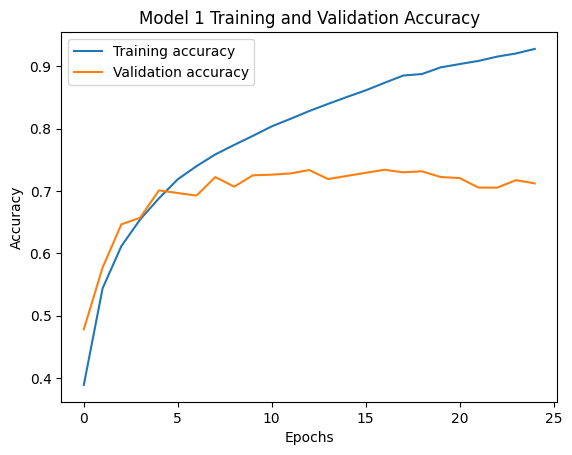

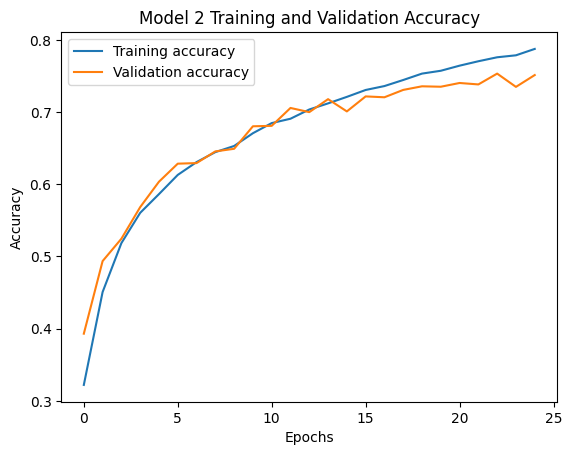

In [16]:
# Plotting training and validation accuracy for Model 1
plt.plot(history1.history['accuracy'], label='Training accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation accuracy')
plt.title('Model 1 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plotting training and validation accuracy for Model 2
plt.plot(history2.history['accuracy'], label='Training accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation accuracy')
plt.title('Model 2 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.85      0.78      0.81      1000
           2       0.55      0.65      0.60      1000
           3       0.48      0.53      0.50      1000
           4       0.66      0.61      0.63      1000
           5       0.58      0.61      0.59      1000
           6       0.80      0.76      0.78      1000
           7       0.71      0.75      0.73      1000
           8       0.80      0.81      0.80      1000
           9       0.87      0.66      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



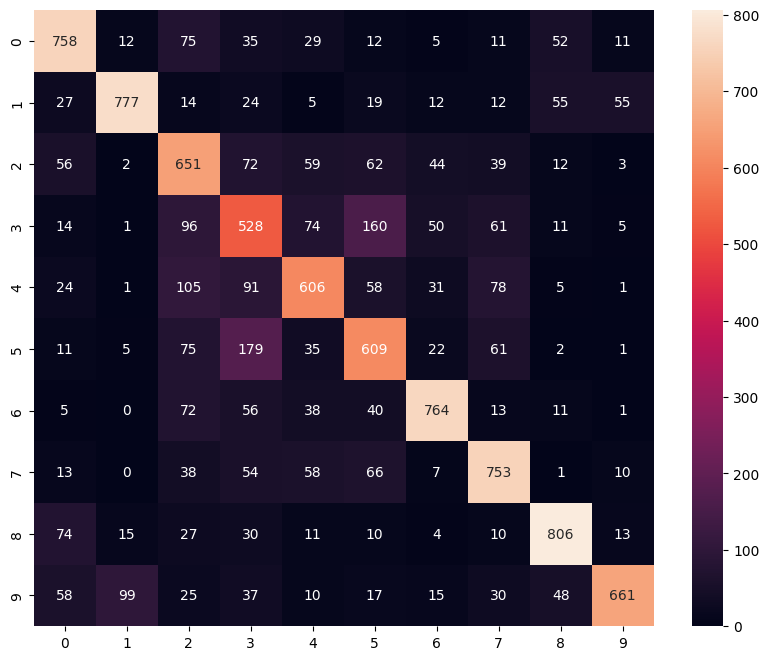

In [18]:
# Generate classification report for Model 1
Y_pred = model1.predict(Xtest)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Ytest, axis=1)
print(classification_report(Y_true, Y_pred_classes))

# Generate confusion matrix for Model 1
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.show()

313/313 [==============================] - 5s 14ms/step
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1000
           1       0.85      0.78      0.81      1000
           2       0.55      0.65      0.60      1000
           3       0.48      0.53      0.50      1000
           4       0.66      0.61      0.63      1000
           5       0.58      0.61      0.59      1000
           6       0.80      0.76      0.78      1000
           7       0.71      0.75      0.73      1000
           8       0.80      0.81      0.80      1000
           9       0.87      0.66      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



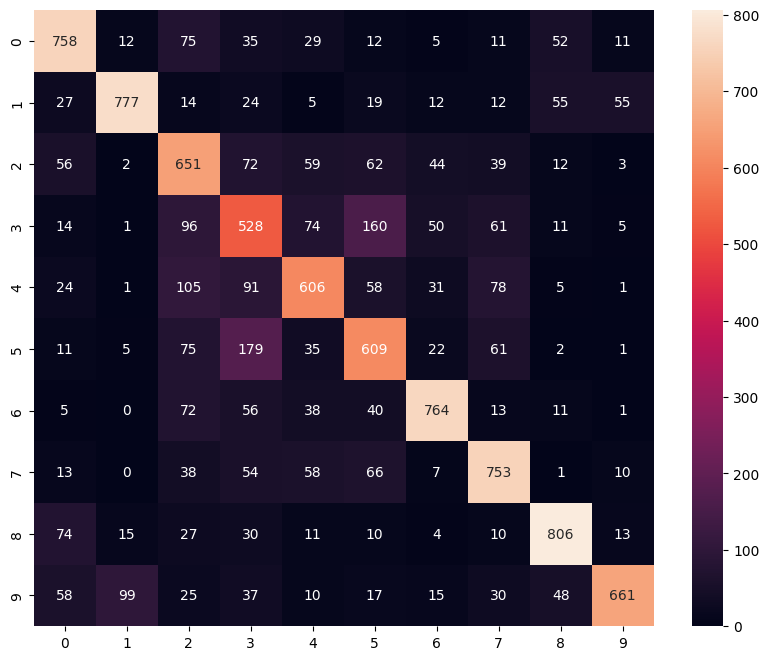

In [17]:
# Generate classification report for Model 2
Y_pred = model1.predict(Xtest)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Ytest, axis=1)
print(classification_report(Y_true, Y_pred_classes))

# Generate confusion matrix for Model 2
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.show()